In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [2]:
alpha = 0.95
N = 100

In [11]:
X = sps.norm.rvs(size=N)

при $\sigma^2 = 1$ : $\sqrt{n}(\overline X  - a) \sim \mathcal{N}(0,1)$

$T_1(X) = \overline{X} + \frac{z_{\frac{(1 - \alpha)}{2}}}{\sqrt{n}}$ , $T_2(X) = \overline{X} + \frac{z_{\frac{(1 + \alpha)}{2}}}{{\sqrt{n}}}$ , 
$\left[ T_1(X) , T_2(X) \right]$ - точный доверительный интервал $a$ уровня доверия  $\alpha$ , где $z_c$ - квантиль стандартного нормального распределения уровня $c$

In [79]:
def build_plot(z1 , z2 , title , xlim=[] , ylim=[]):
    plt.figure(figsize=(13,8))
    plt.title(title,fontsize=16)
    plt.plot(n, z2, color='black')
    plt.plot(n, z1, color='black')
    plt.fill_between(n, z1, z2, facecolor='blue' , alpha=0.5)
    plt.xlabel("n")
    if(len(xlim) == 0):
        plt.xlim([1,100])
    else :
        plt.xlim(xlim)
    if(len(ylim) == 0) :
        ylimmax = max(abs(np.min(z1[5:100])), abs(np.max(z2[5:100])))
        plt.ylim(-1.2 * ylimmax , 1.2 * ylimmax)
    else :
        plt.ylim(ylim)
    plt.grid(True)
    plt.show()

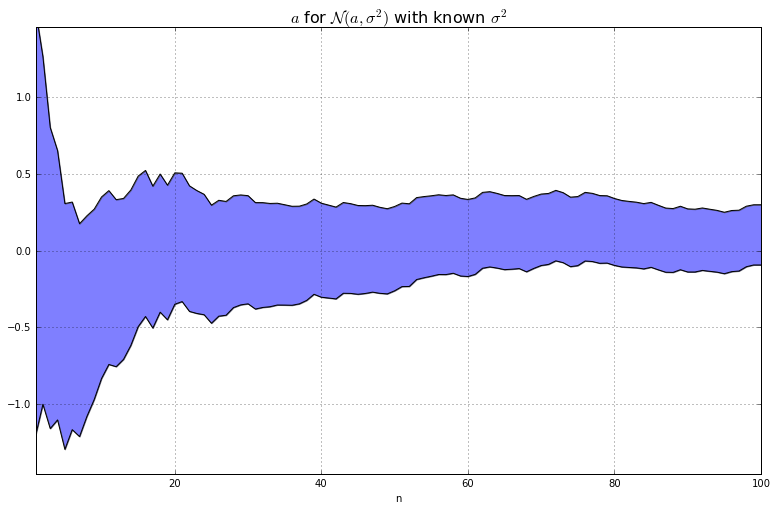

In [80]:
n = np.arange(1, N + 1 , 1)
# get trust levels
z1 = [np.mean(X[0:k+1]) + (len(X[0:k+1]) ** (-0.5))*sps.norm.ppf((1 - alpha) / 2) for k in n]
z2 = [np.mean(X[0:k+1]) + (len(X[0:k+1]) ** (-0.5))*sps.norm.ppf((1 + alpha) / 2) for k in n]
title = r'$ a $ for $ \mathcal{N}(a , \sigma^2) $ with known $\sigma^2$'
build_plot(z1, z2 ,title)

при $a = 0 : n \overline {X^2} \sim \chi^2(n) \sigma^2$ 

Тогда $P(z_{\frac{1-\alpha}{2}} < \frac{n \overline {X^2}}{\sigma^2} < z_{\frac{1+\alpha}{2}}) = \alpha$, где $z_x$ - квантиль уровня $x$ распределения $\chi^2(n)$

$\implies \left[\frac{n\overline{X^2}}{z_{\frac{1+\alpha}{2}}};\frac{n\overline{X^2}}{z_{\frac{1-\alpha}{2}}}\right]$ - 
точный доверительный интервал для $\sigma^2$ уровня $\alpha$

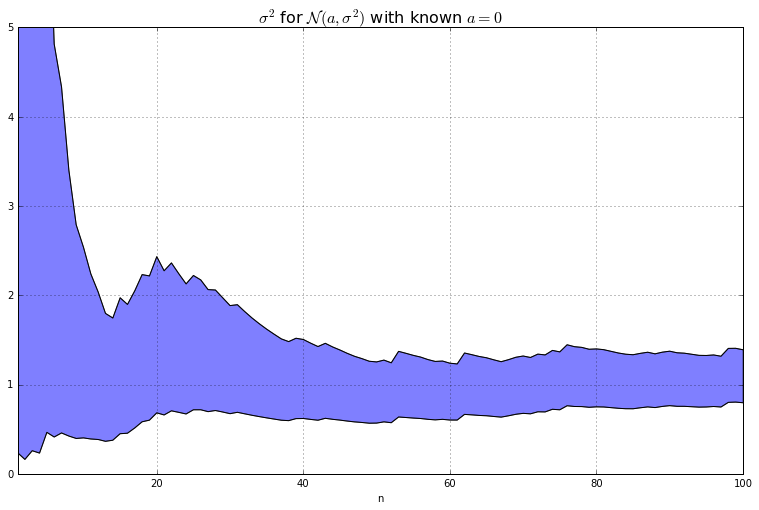

In [84]:
n = np.arange(1, N + 1 , 1)
# get trust levels
X2 = X**2
z1 = [np.sum(X2[0:k+1])/sps.chi2.ppf(q=(1 + alpha) / 2, df=k) for k in n]
z2 = [np.sum(X2[0:k+1])/sps.chi2.ppf(q=(1 - alpha) / 2, df=k) for k in n]
title = r'$ \sigma^2 $ for $ \mathcal{N}(a , \sigma^2) $ with known $a = 0$'
build_plot(z1, z2 ,title , ylim=[0,5])

Найдем точный доверительный интервал для $a$ при $x_i \sim \mathcal{N}(a,\sigma^2)$

Положим $\tilde{s} := \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$ , тогда 

$\sqrt{n}\frac{\overline{X} - a}{\tilde{s}} \sim t_{n-1}$ - распределение Стьюдента с $n - 1$ степенью свободы

$P\left(z_{\frac{1-\alpha}{2}} < \sqrt{n}\frac{\overline{X} - a}{\tilde{s}} < z_{\frac{1+\alpha}{2}}\right) = \alpha$ ,  где $z_c$ - квантиль уровня $c$ распределения Стьюдента.
$\implies \left[ \overline{X} - z_{\frac{1+\alpha}{2}} \frac{\tilde{s}}{\sqrt{n}};\overline{X} - z_{\frac{1-\alpha}{2}} \frac{\tilde{s}}{\sqrt{n}} \right]$ - точный доверительный инетрвал.

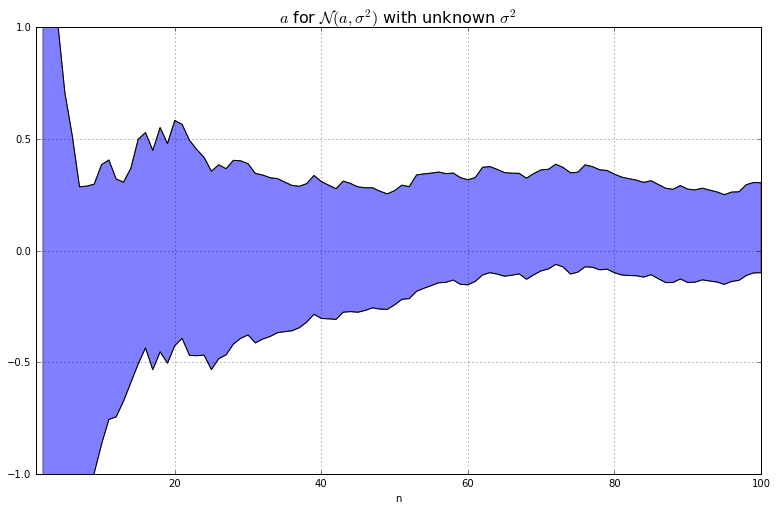

In [96]:
n = np.arange(2, N + 1 , 1)
z1 = [np.mean(X[0:k+1]) - sps.t.ppf(q=(1 + alpha) / 2, df=k-1)
      * (np.var(X[0:k+1]) / (k-1))**(0.5)  for k in n]
z2 = [np.mean(X[0:k+1]) - sps.t.ppf(q=(1 - alpha) / 2, df=k-1) 
      * (np.var(X[0:k+1]) / (k-1))**(0.5)  for k in n]

title = r'$ a $ for $ \mathcal{N}(a , \sigma^2) $ with unknown $\sigma^2$'
build_plot(z1, z2 ,title,ylim=[-1,1])

Найдем доврительный интервал для $\sigma^2$ при неизвестном $a$

Используя, что $\frac{(n-1)\tilde{s}^2}{\sigma^2} \sim \chi^2_{n-1}$ , получим

- $\left[\frac{(n-1)\tilde{s}^2}{z_{\frac{1+\alpha}{2}}}:\frac{(n-1)\tilde{s}^2}{z_{\frac{1-\alpha}{2}}}\right]$ - искомый интервал, где $z_{c}$ - квантиль уровня $c$ распределения $\chi^2_{n-1}$

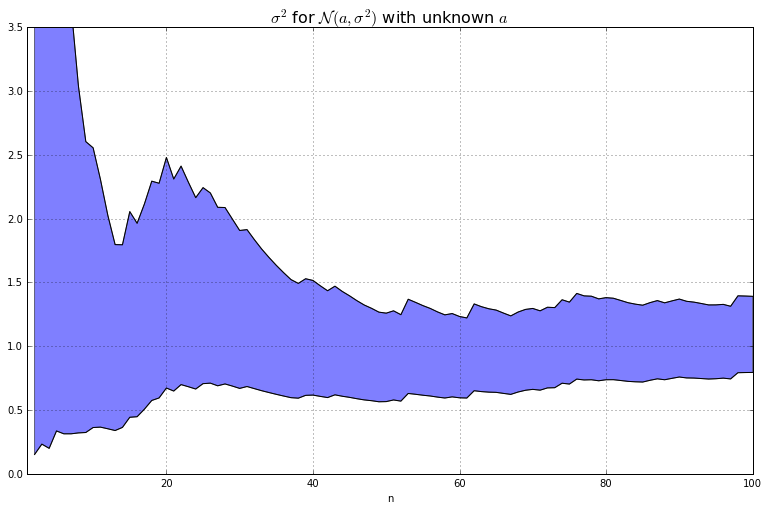

In [97]:
n = np.arange(2, N + 1 , 1)
z1 = [k * np.var(X[0:k+1]) / sps.chi2.ppf(q=(1 + alpha) / 2, df=k-1)  for k in n]
z2 = [k * np.var(X[0:k+1]) / sps.chi2.ppf(q=(1 - alpha) / 2, df=k-1)  for k in n]
title = r'$ \sigma^2 $ for $ \mathcal{N}(a , \sigma^2) $ with unknown $a$'
build_plot(z1, z2 ,title ,ylim=[0,3.5])

Построим довериельную область для $(a,\sigma^2)$

Обозначим : 
 - $\xi_1 = \frac{1}{\sigma^2}\left|X - Z\hat{\theta}\right|^2 \sim \chi^2_{n-k}$ 

 - $\xi_2 = \frac{1}{\sigma^2}\left|Z\left(\theta - \hat{\theta}\right)\right|^2 \sim \chi^2_{k}$

Воспользуемся тем, что $\hat{\theta}$ и $(X - Z\hat{\theta})$ независимы 
$\implies \xi_1$ и $\xi_2$ независимы

Пусть $Z = (1 \dots 1)^{T}$.

Тогда  $\hat{\theta} = \bar{X}$,  $P(\mu_{0.01} < \xi_1 < \mu_{\sqrt{\alpha} + 0.01}, 0 < \xi_2 < \nu_{\sqrt{\alpha}}) = \alpha$

Тогда доверительная область для $\mathcal{N}(a,\sigma^2)$:

- $\sigma^2 \in \left(\frac{n \left(\overline{X^2} - \overline{X}^2\right)}{z_{\sqrt{\alpha} + 0.01}},
\frac{n\left(\overline{X^2} - \overline{X}^2\right)}{z_{0.01}}\right)$ 

- $a \in \left(\overline{X} - \sqrt{\frac{\sigma^2 \nu_{\sqrt{\alpha}}}{n}}, \overline{X} + \sqrt{\frac{\sigma^2 \nu_{\sqrt{\alpha}}}{n}}\right)$ 


где $z$ и $\nu$ - квантили распределений соответственно $\chi^2_{n-1}$ и $\chi^2_{1}$ 


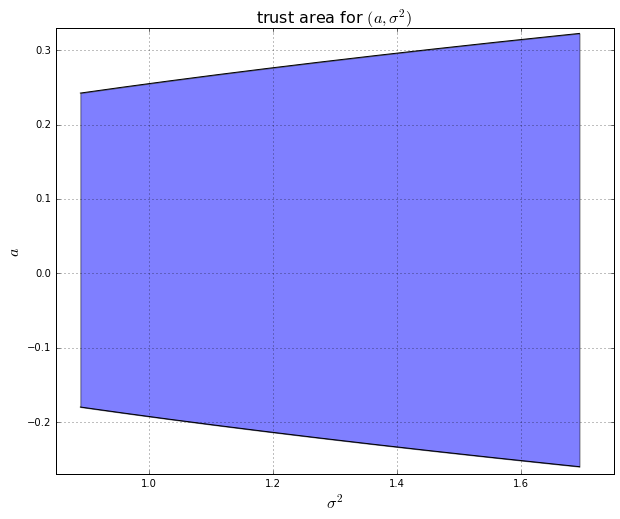

In [128]:
sigma2_l = ((N) * X.var())/(sps.chi2.ppf(df=(N-1),q=(alpha**0.5+0.01))) 
sigma2_r = ((N) * X.var())/(sps.chi2.ppf(df=(N-1),q=(0.01)))
OX = np.arange(sigma2_l , sigma2_r + 0.001 , 0.001)
a_low = np.zeros(len(OX))
a_high = np.zeros(len(OX))
for i in range(len(OX)):
    sg2 = OX[i]
    nu = sps.chi2.ppf(df = 1, q=(alpha**0.5))
    help_sqr = (sg2 * nu/N) ** 0.5
    a_low[i] = np.mean(X) - help_sqr
    a_high[i] = np.mean(X) + help_sqr
plt.figure(figsize=(10,8))
plt.plot(OX ,a_low , 'black')
plt.plot(OX ,a_high , 'black')
plt.fill_between(OX,a_low,a_high,facecolor='blue' , alpha = 0.5)
plt.xlim([0.85,1.75])
plt.ylim([-0.27,0.33])
plt.xlabel(r"$\sigma^2$",fontsize=16)
plt.ylabel(r"$a$",fontsize=16)
plt.title(r'trust area for $(a,\sigma^2)$',fontsize=16)
plt.grid(True)
plt.show()
